<a href="https://colab.research.google.com/github/SrijaniDas-GitHub/Classification_problems/blob/master/Customer_Behavior_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Source of this dataset

 https://www.kaggle.com/denisadutca/customer-behaviour

# About the data

This is data of 400 clients of a company including a unique ID, the gender, the age of the customer and the salary. We want to predict whether a given customer purchased the product or not.

# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading the data

In [2]:
customer_df = pd.read_csv("/content/datasets_404740_776176_Customer_Behaviour.csv")

In [3]:
customer_df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


# Encoding Categorical Data

In [5]:
customer_df["Male"] = pd.get_dummies(customer_df["Gender"])["Male"]

# Drop Unnecessary Features

In [6]:
for col in ["Gender", "User ID"]:
  customer_df.drop(col, axis=1, inplace=True)

# Visualizing Data

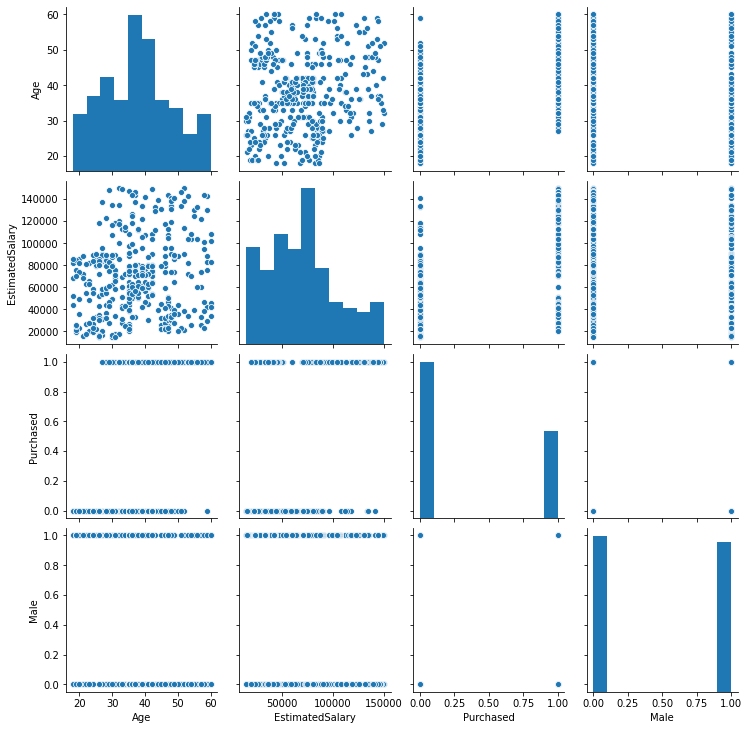

In [7]:
sns.pairplot(customer_df)

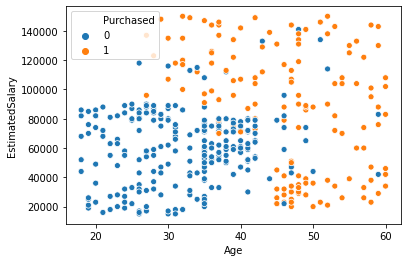

In [8]:
sns.scatterplot(customer_df["Age"], customer_df["EstimatedSalary"], hue=customer_df["Purchased"])

**Observation :**
- Customer over the age of 40 tend to purchase the product irrespective of their salary
- Customer having higher estimated salary tend to purchase the product irrespective of their age
- Customer with lower salary (<80000) and age below 40 did not buy the product

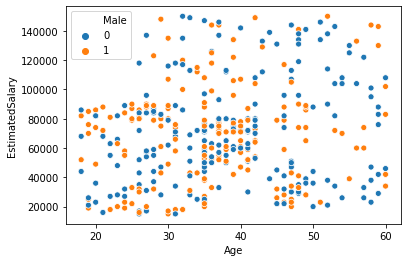

In [9]:
sns.scatterplot(customer_df["Age"], customer_df["EstimatedSalary"], hue=customer_df["Male"])

**Observation :** Customer of both genders have similar salary in this data

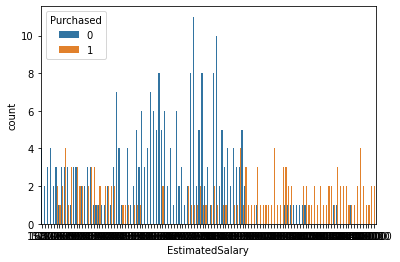

In [10]:
sns.countplot(customer_df["EstimatedSalary"], hue=customer_df["Purchased"])

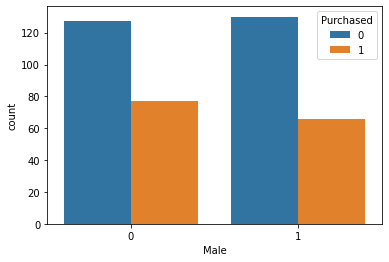

In [11]:
sns.countplot(customer_df["Male"], hue=customer_df["Purchased"])

**Observation :**
- The data is well balanced
- Male customers have a little less purchase rate 

# Splitting the data for training and testing

In [12]:
X = customer_df.drop("Purchased", axis=1).values
y = customer_df["Purchased"].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

# Feature Scaling

KNN requires scaling of data because KNN uses the Euclidean distance between two data points to find nearest neighbors. 
Euclidean distance is sensitive to magnitudes. 
The features with high magnitudes will weight more than features with low magnitudes.
Ref Link : https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

Standardization is not required for logistic regression.
The main goal of standardizing features is to help convergence of the technique used for optimization. 
If you use logistic regression with LASSO or ridge regression (as Weka Logistic class does) you should. 
Ref Link : https://stats.stackexchange.com/questions/48360/is-standardization-needed-before-fitting-logistic-regression

Decision Tree and Random Forest do not require feature scaling as well.

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluating Model Performance

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
def evaluate_model_performance(y_test, y_pred):
  print(accuracy_score(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))

# K-Nearest Neighbors Classifier

First we need to choose the right value of K for fitting the model. We will use elbow method for choosing the value of K that minimizes test error.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Error Rate')

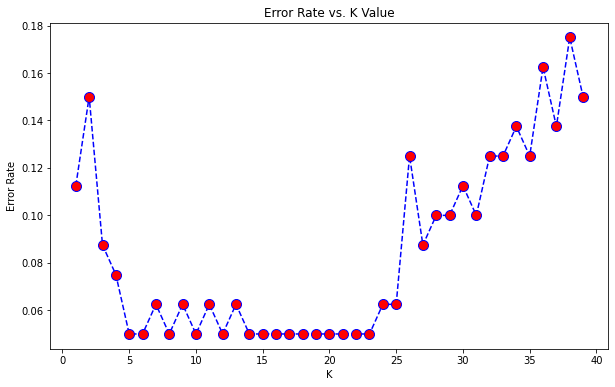

In [17]:
error_rate = []

for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train_scaled,y_train)
    pred_i = model.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

As per the graph, using k=5 should produce the minimum error.

In [18]:
model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

evaluate_model_performance(y_test, y_pred)

0.95
[[47  0]
 [ 4 29]]


# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

evaluate_model_performance(y_test, y_pred)

0.5875
[[47  0]
 [33  0]]


# Decision Tree Classification

In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

evaluate_model_performance(y_test, y_pred)

0.875
[[45  2]
 [ 8 25]]


# Random Forest Classification

In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

evaluate_model_performance(y_test, y_pred)

0.9125
[[46  1]
 [ 6 27]]


# Conclusion

We will use KNNClassifier for this data as this has given the most accurate prediction. (95% accuracy)